# **SECTION1-PROJECT**

vgames2.csv / Dataset

Name : 게임 이름

Platform : 게임 지원 플랫폼

Year : 게임 출시 연도

Publisher : 게임 제작 회사

NA_Sales : 북미지역 출고량

EU_Sales : 유럽지역 출고량

JP_Sales : 일본지역 출고량

Other_Sales : 기타지역 출고량




#**목표**
1.지역에 따라서 선호하는 게임 장르가 다를까

2.연도별 게임의 트렌드가 있을까

3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스

4.다음 분기에 어떤 게임을 설계해야 할까






In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

address='/content/drive/MyDrive/ai13/vgames2.csv'
df = pd.read_csv(address)

In [3]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()
df.drop(['Unnamed: 0'],axis = 1,inplace=True)
df.reset_index(inplace=True,drop=True)

In [4]:
# EDA 전처리, 데이터 단일화(M:1,000,000).   M 은 문자열제거 K는 1000 나눠줘서 수치 단일화
# 모든 SALES 컬럼에 대해서 FOR문 처리하면서 IF 문자열 중 M이나 K가 있으면 없애주고 TEMP 값 형변환 하고 연산처리.

def chage(df2):
 for i in range(len(df)):
   if df2.loc[i].find("K") != -1 :
     temp=df2.loc[i]                 # Sales값에 K 문자를 포함한다면 제거 후 1000으로 나눠주고 형변환 한다.
     temp=int(temp.replace('K',''))
     temp=temp/1000
     df2.loc[i]=temp
   elif df2.loc[i].find("M") != -1 :
     temp=df2.loc[i]                 # Sales값에 M 문자를 포함한다면 제거하고 형변환 한다.
     temp=float(temp.replace('M',''))
     df2.loc[i]=temp
   else :
     temp=df2.loc[i]                 # 위의 두 조건이 아닐 경우 형변환만 한다.
     df2.loc[i]=float(temp)
     
 return df2

def yearchage(df2):
 for i in range(len(df)):
   if (df2.loc[i] >= 80) & (df2.loc[i] <= 99) :
     temp=df2.loc[i]                 # Year 값의 표기법을 변경한다. (ex: 98년도 -> 1998년) 
     temp=int(temp+1900)
     df2.loc[i]=temp
   elif df2.loc[i] <= 79 :
     temp=df2.loc[i]
     temp=int(temp+2000)
     df2.loc[i]=temp
   else :
     temp=df2.loc[i]
     df2.loc[i]=int(temp)
 return df2


chage(df['NA_Sales'])
chage(df['EU_Sales'])
chage(df['JP_Sales'])
chage(df['Other_Sales'])
yearchage(df['Year'])
df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.0,0.0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,0.02,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.0,0.0,0.0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


#**Q1. 지역에 따라서 선호하는 게임 장르가 다를까**

> Genre VS Sales

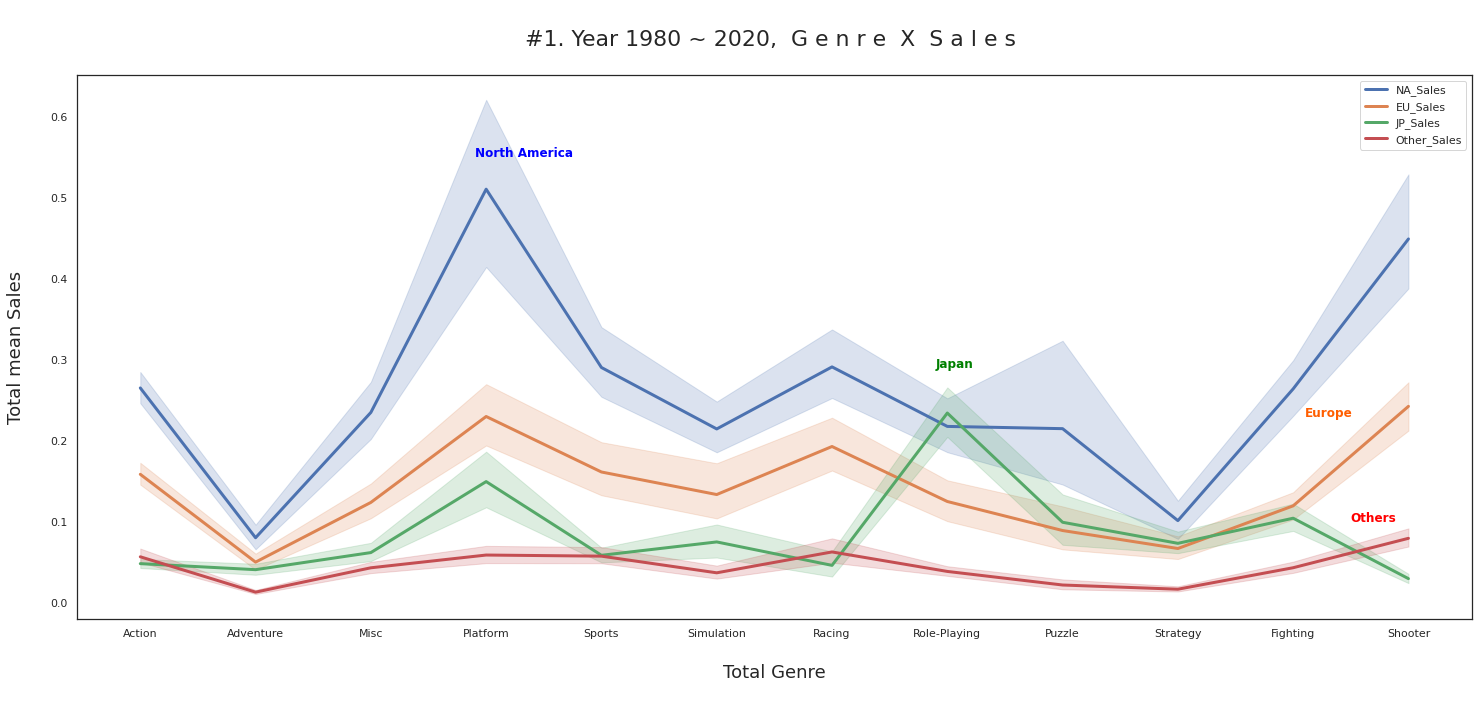

In [27]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


sns.set(style='white',rc = {'figure.figsize':(25,10)})
plt.title('\n#1. Year 1980 ~ 2020,  G e n r e  X  S a l e s \n',fontsize=22)

sns.lineplot(x="Genre", y="NA_Sales", data=df, palette="colorblind",linewidth=3)
sns.lineplot(x="Genre", y="EU_Sales", data=df, palette="muted",linewidth=3)
sns.lineplot(x="Genre", y="JP_Sales", data=df, palette="deep",linewidth=3)
sns.lineplot(x="Genre", y="Other_Sales", data=df, palette="bright",linewidth=3)
plt.xlabel('\nTotal Genre\n',fontsize=18)
plt.ylabel('Total mean Sales\n',fontsize=18)
plt.legend(labels=["NA_Sales","EU_Sales","JP_Sales","Other_Sales"])
plt.text(2.9, 0.55, "North America", horizontalalignment='left', size='medium', color='blue', weight='semibold')
plt.text(10.1, 0.23, "Europe", horizontalalignment='left', size='medium', color='#FF5E00', weight='semibold')
plt.text(6.9, 0.29, "Japan", horizontalalignment='left', size='medium', color='green', weight='semibold')
plt.text(10.5, 0.1, "Others", horizontalalignment='left', size='medium', color='red', weight='semibold')
plt.show()



---
#A
지역별로 선호하는 게임의 장르가 다르다는 것을 시각화를 통해 알 수 있다. (그림 #1)

북미지역은 Platform 장르 선호도가 평균적으로 높았고,

일본지역은 Role-Playing,

유럽과 기타지역은 Shooter 장르의 선호도가 높았다.


---




#**Q2. 연도별 게임의 트렌드가 있을까**

> Platform VS Year

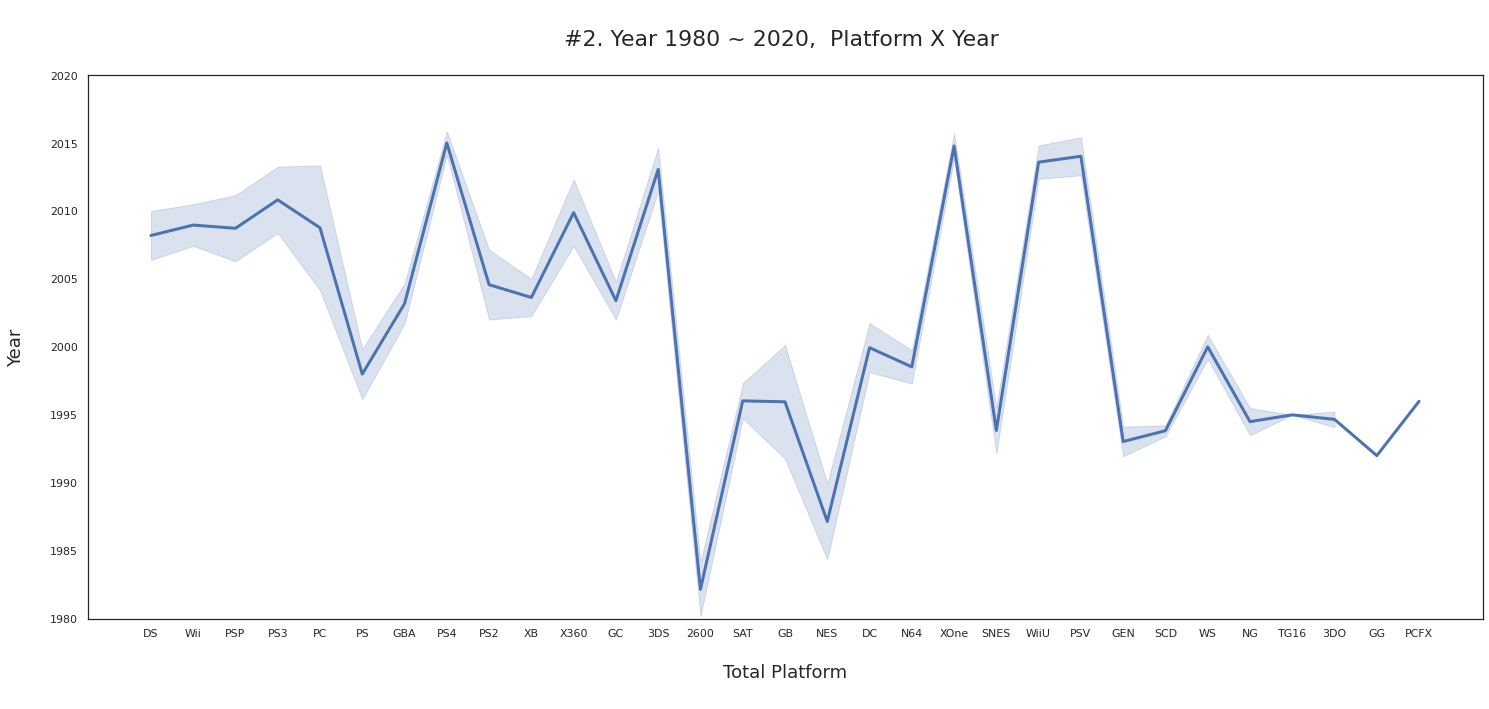

In [28]:
plt.title('\n#2. Year 1980 ~ 2020,  Platform X Year \n',fontsize=22)

sns.lineplot(x="Platform", y="Year", data=df,ci="sd",linewidth=3)
plt.ylim(1980,2020)
plt.xlabel('\nTotal Platform\n',fontsize=18)
plt.ylabel('Year\n',fontsize=18)
plt.show()



#A
---
매년 기술의 발전에 따라 다양한 플랫폼이 나오고 있다.

따라서, 연도별 플랫폼을 비교 해보고자 그래프를 시각화 했다.(그림 #2)

1980 - 1985년 [Atari 2600]

1985 - 1990년 [Nintendo NES]

            ⬇
2013년 이후로는 [BROOK XONE], [SIE PS4, PS5], [Nintendo 3DS, wii u] 가 주를 이루는 게임플랫폼이다.



---










#**Q3. 출고량이 높은 게임에 대한 분석 및 시각화**

> Sales.sum() VS Game

In [7]:
df['Total_Sales']=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales'] # 전 지역 총 출고량(Total_Sales) Feature Engineering
total_df=df.sort_values(by=['Total_Sales'], axis=0,ascending=False) # 총 출고량 TOP 10 , sort
total_df=total_df.iloc[0:10,:] 
total_df.reset_index(drop=True,inplace=True)
total_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.38
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.5,2.9,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.2,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.7,2.26,28.61
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


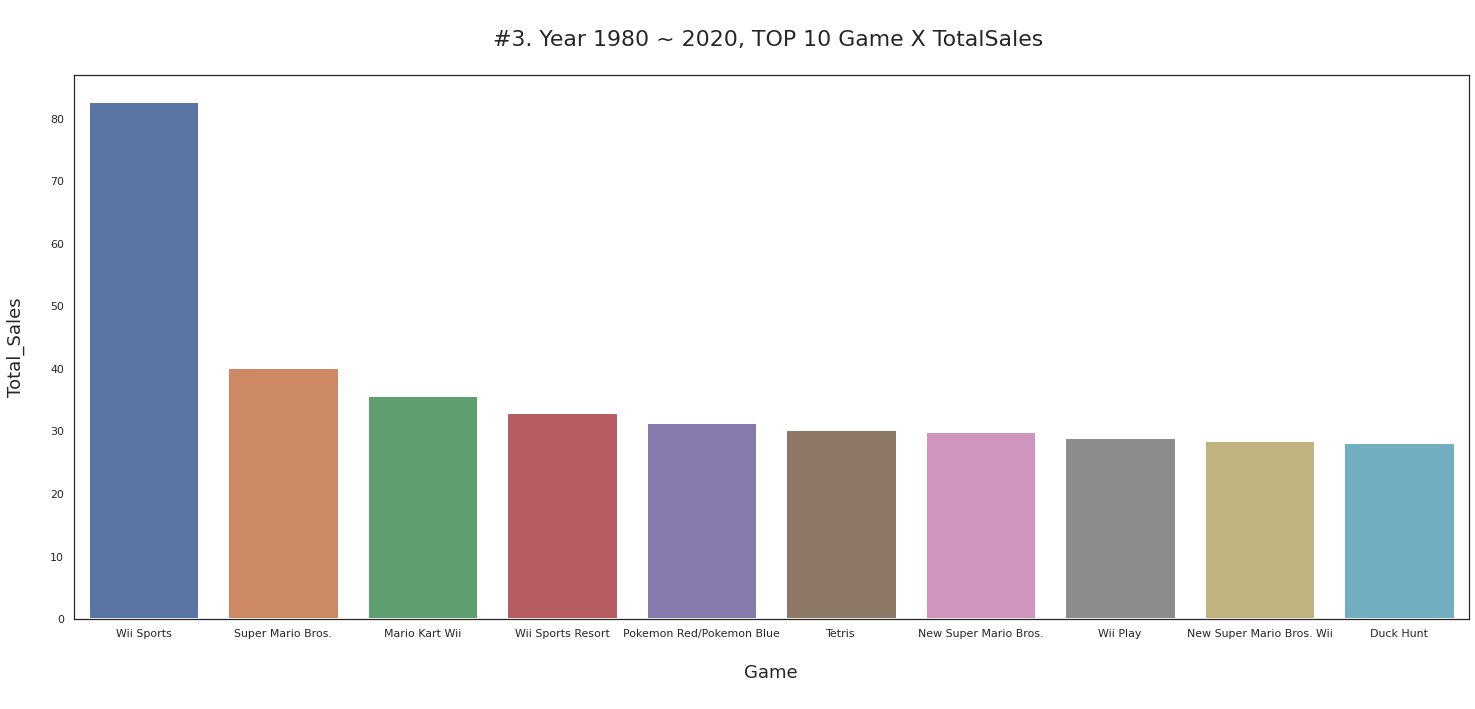

In [29]:
plt.title('\n#3. Year 1980 ~ 2020, TOP 10 Game X TotalSales \n',fontsize=22)

sns.barplot(x="Name", y="Total_Sales", data=total_df,ci="sd",linewidth=3)
plt.xlabel('\nGame\n',fontsize=18)
plt.ylabel('Total_Sales\n',fontsize=18)
plt.show()


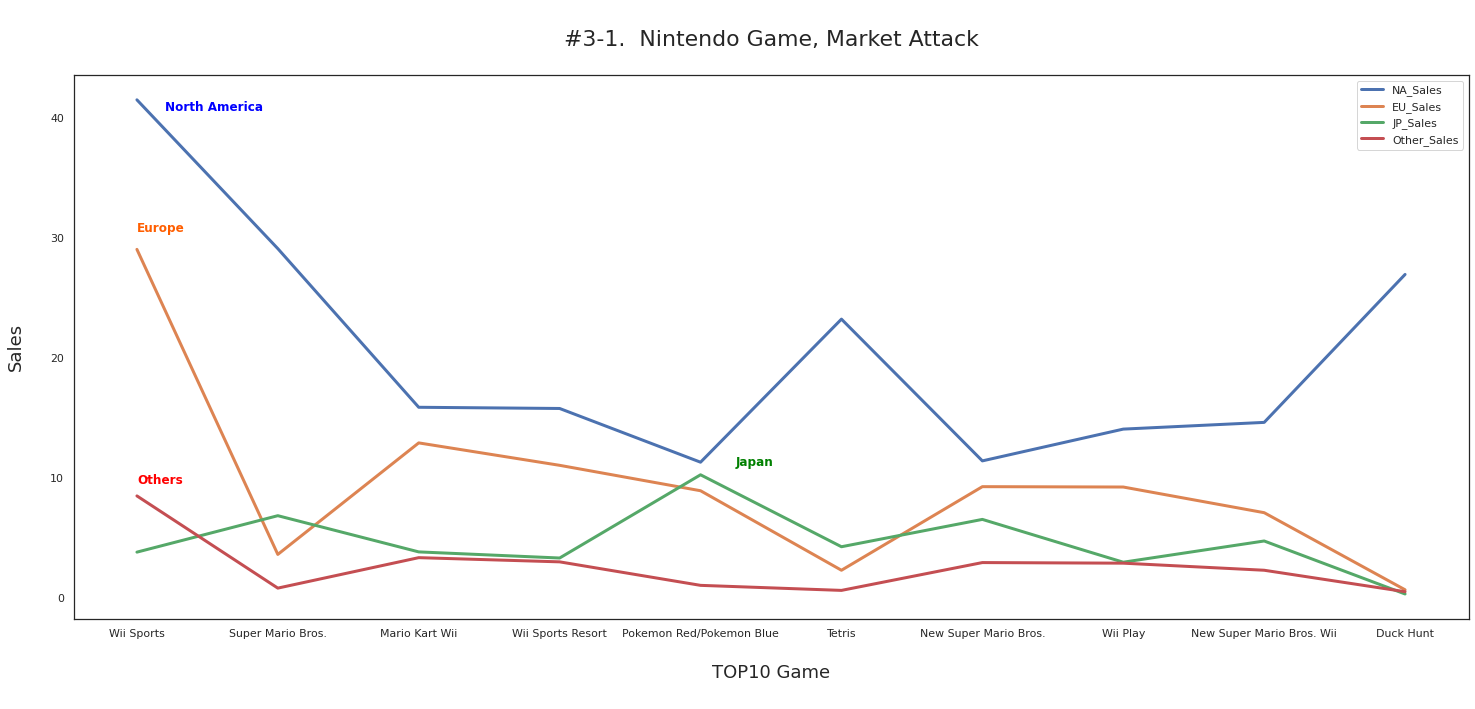

In [30]:
plt.title('\n#3-1.  Nintendo Game, Market Attack\n',fontsize=22)
sns.lineplot(x="Name", y="NA_Sales", data=total_df,linewidth=3)
sns.lineplot(x="Name", y="EU_Sales", data=total_df, palette="muted",linewidth=3)
sns.lineplot(x="Name", y="JP_Sales", data=total_df, palette="deep",linewidth=3)
sns.lineplot(x="Name", y="Other_Sales", data=total_df, palette="bright",linewidth=3)
plt.xlabel('\nTOP10 Game\n',fontsize=18)
plt.ylabel('Sales\n',fontsize=18)
plt.legend(labels=["NA_Sales","EU_Sales","JP_Sales","Other_Sales"])
plt.text(0.2, 40.6, "North America", horizontalalignment='left', size='medium', color='blue', weight='semibold')
plt.text(0, 30.5, "Europe", horizontalalignment='left', size='medium', color='#FF5E00', weight='semibold')
plt.text(4.25, 11, "Japan", horizontalalignment='left', size='medium', color='green', weight='semibold')
plt.text(0, 9.5, "Others", horizontalalignment='left', size='medium', color='red', weight='semibold')
plt.show()


#A
---
출고량이 높은 게임순으로 정렬을 했다.(그림. #3) 

1.Wii Sports

2.Super Mario Bros . . . . etc.

**놀라운 사실을 발견했다.**

북미, 유럽, 일본, 그 외 지역의 **TOP10** 게임이 모두 같은 개발사**(Nintendo)**였다.

그래서 일본에 본사를 둔 닌텐도가 어떤 게임으로 어느 지역을 공략했는지 분석하기위해 자료조사와 시각화를 했고(그림. #3-1),

그 결과 닌텐도는 90년대 후반부터 글로벌 마켓을 타겟으로 삼아

북미지역의 진출에 성공한 것을 알 수 있었다. 

---





#**Q4. 다음 분기에 어떤 게임을 설계해야 할까**


**1.지역에 따라서 선호하는 게임 장르**

NA : Platform

JP : Role-Playing,

EU & Other : Shooter

**2.연도별 게임의 트렌드**

2013년 이후로는 [BROOK XONE], [SIE PS4, PS5], [Nintendo 3DS, wii u]

**3.출고량이 높은 게임**

Nintendo, NA_Sales

#A


---
**Q1~Q3에서 도출한 인사이트를 바탕으로**

**PS4, PS5, 3DS 기기를 지원하는 platform 또는 shooter 장르의 게임을**

**북미지역을 주 타겟으로 설계하면 성공률이 높을 것이다.**


---





